In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from statsmodels.api import OLS, add_constant

In [2]:
pd.set_option('display.max_columns', None) #顯示所有columns，不用...的方式省略

data = pd.read_csv('house_train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

<h2 style="font-size:15px; color:blue;">找出遺失值數量(比例)</h2>

In [3]:
features_with_na = [features for features in data.columns if data[features].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, data[feature].isnull().sum(), 'missing values')

# for feature in features_with_na:
#     print(feature, np.round(data[feature].isnull().mean()*100, 4), '% missing values')

LotFrontage 259 missing values
Alley 1369 missing values
MasVnrType 872 missing values
MasVnrArea 8 missing values
BsmtQual 37 missing values
BsmtCond 37 missing values
BsmtExposure 38 missing values
BsmtFinType1 37 missing values
BsmtFinType2 38 missing values
FireplaceQu 690 missing values
GarageType 81 missing values
GarageYrBlt 81 missing values
GarageFinish 81 missing values
GarageQual 81 missing values
GarageCond 81 missing values
PoolQC 1453 missing values
Fence 1179 missing values
MiscFeature 1406 missing values


<h2 style="font-size:15px; color:blue;">找出有遺失值的數值型特徵</h2>

In [4]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

print('Number of features: ',len(numerical_features))

data[numerical_features].head()

Number of features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [5]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<h2 style="font-size:15px; color:blue;">找出有遺失值的離散型特徵</h2>

In [6]:
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature + ['Id']]
print('Discrete variables count: {}'.format(len(discrete_feature)))
discrete_feature                                                                                     

Discrete variables count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [7]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


<h2 style="font-size:15px; color:blue;">找出有遺失值的類別型特徵</h2>

In [8]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(len(categorical_features))
print(categorical_features)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [9]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

<h2 style="font-size:15px; color:blue;">處理連續型遺失值</h2>

In [11]:
features_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtype=='O']

for feature in features_nan:
    print('{}: {} missing value'.format(feature, data[feature].isnull().sum()))

Alley: 1369 missing value
MasVnrType: 872 missing value
BsmtQual: 37 missing value
BsmtCond: 37 missing value
BsmtExposure: 38 missing value
BsmtFinType1: 37 missing value
BsmtFinType2: 38 missing value
FireplaceQu: 690 missing value
GarageType: 81 missing value
GarageFinish: 81 missing value
GarageQual: 81 missing value
GarageCond: 81 missing value
PoolQC: 1453 missing value
Fence: 1179 missing value
MiscFeature: 1406 missing value


In [12]:
#這裡是將有nan的data挑出來，把nan換成Missing 標籤，因為等等要編碼(encode)，它不能是nan
def replace_cat_feature(data, features_nan):
    data1 = data.copy()
    data1[features_nan]=data[features_nan].fillna('Missing')
    return data1

data = replace_cat_feature(data, features_nan)

#nan沒有了，變成了Missing 標籤，所以都是0
data[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [14]:
numerical_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtype!='O']

for feature in numerical_with_nan:
    print('{}: {} missing value'.format(feature, data[feature].isnull().sum()))

LotFrontage: 259 missing value
MasVnrArea: 8 missing value
GarageYrBlt: 81 missing value


In [15]:
#數值型data用中位數填補

for feature in numerical_with_nan:
    median_value = data[feature].median()
    print(median_value) #印出中位數是多少？

    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value, inplace=True)

data[numerical_with_nan].isnull().sum()

69.0
0.0
1980.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32640\1981707804.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(median_value, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32640\1981707804.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [16]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0

In [17]:
#這裡我們把建築年份(YearBuilt)、改建年份(YearRemodAdd)以及車庫建造年份(GarageYrBlt)這些跟"年"有關的換成"年紀"
#所以我們可以用賣出年份(YrSold)減掉它們三個，並且把裡面的值換成年紀

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature] = data['YrSold']-data[feature]
    # data[feature + '_Age'] = data['YrSold'] - data[feature] #儲存在新欄位
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [18]:
#有一說，對年紀取log，預測效果會變好，這是因為取log能平滑數據，減少極端值的影響，也就是讓比較偏的資料變的更像常態分配，這對線性回歸很有幫助
#況且，如果年紀的增長對價格是非線性(指數)的成長，取log更能捕捉到這非線性的關係

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature] = np.log(data['YrSold']-data[feature])
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,7.602401,7.602401,7.602401
1,7.588830,7.588830,7.588830
2,7.601402,7.601902,7.601402
3,7.557473,7.585789,7.599902
4,7.600902,7.600902,7.600902


In [19]:
# data.head()

In [20]:
# num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']

# scaler= MinMaxScaler()
# data[num_features] = scaler.fit_transform(data[num_features]) #把鄰街距離、地段面積、1樓面積以及地面上總面積都壓縮到0~1

# data[num_features].head()

<h2 style="font-size:15px; color:blue;">處理類別型遺失值</h2>

In [21]:
categorical_feattures = [feature for feature in data.columns if data[feature].dtypes=='O' ]
categorical_feattures

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
#這裡我們把一些類別變數，出現頻率 < 1%的種類合併為 rare cate

for feature in categorical_features:
    temp = data.groupby(feature)['SalePrice'].count()/len(data) #計算出現頻率
    temp_df = temp[temp>0.01].index #出現頻率 >1%就放在temp_df
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], 'rare cate') #np.where()是用來替換類別，在temp_df中的不便，不在temp_df則換成rare cate

#這是為了減少少數類別的噪音，提高模型的泛化能力

In [23]:
#這裡我們把類別型特徵轉成數值型
#也就是，每種類別算出他們的平均SalePrice，由平均SalePrice的高到低，給不同類別貼上標籤0,1,2...
for feature in categorical_features:
    
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index 
    #把每個feature的類別用groupby()分組，挑出SalePrice欄位，mean()計算平均，.sort_values()排序大到小，index給他們每組產生標籤: 0、1、2...
    
    labels_ordered={k:i for i, k in enumerate(labels_ordered,0)}
    #這裡使用一個字典，將每個類別賦予他們一個值，比如: 排序後是['A','B','C']，則字典就是{'A': 0, 'B': 1, 'C': 2}，enumerate(labels_ordered,0)就是在排序後，從0開始，給他們分到一個標籤
    
    data[feature]=data[feature].map(labels_ordered)
    #最後我們使用map()，將原本的類別變成0、1、2...，比如: 將A變成0，B變成1，C變成2

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,7.602401,7.602401,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,7.602401,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,7.588830,7.588830,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,7.588830,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7.601402,7.601902,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.601402,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,7.557473,7.585789,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,7.599902,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,7.600902,7.600902,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,7.600902,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


<h2 style="font-size:15px; color:blue;">對所有特徵的觀察值做MinMax，將數值縮放到0~1，且對要預測的SalePrice取log，減少極端值的影響</h2>

In [25]:
feature_scale = [feature for feature in data.columns if feature not in 'Id' and 'SalePrice']

scaler = MinMaxScaler()
# scalar.fit_transform(data[feature_scale])

data[['log_SalePrice']]= np.log(data[['SalePrice']])

#把MinMax後的特徵的觀察值、取log後的SalePrice以及一開始的Id合併回一個dataframe
data = pd.concat([data[['Id','log_SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.fit_transform(data[feature_scale]), columns=feature_scale)],
                  axis=1)

data = data.drop(['SalePrice'], axis=1)

print(data.shape)
data.head()

(1460, 84)


,Id,log_SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.950952,0.884883,0.0,0.0,0.9,0.9,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.938013,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.760147,0.437059,0.0,0.0,0.1,0.2,0.333333,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.696875,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.936907,0.868405,0.0,0.0,0.9,0.9,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.920263,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.319290,0.336712,0.0,0.0,0.2,0.4,0.333333,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.893604,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.929879,0.835424,0.0,0.0,0.9,0.9,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.911381,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [26]:
#篩選重要特徵: Forward Selection
X = data.drop(['Id','log_SalePrice'], axis=1)
y = data[['log_SalePrice']]

# 構建 SequentialFeatureSelector
forward_feature_selection = SequentialFeatureSelector(estimator=LinearRegression(),
                                                      n_features_to_select='auto',
                                                      direction='forward',
                                                      scoring='r2',
                                                      cv=5,
                                                      n_jobs=-1)

selected_features = forward_feature_selection.fit(X.values, y)

In [27]:
selected_features_mask = selected_features.get_support()
select = X.columns[selected_features_mask]

print('Numbers of Selected Features: ',len(select))
print('Selected Features: ',select)

Numbers of Selected Features:  41
Selected Features:  Index(['MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'MasVnrType', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'SaleCondition',
       'MasVnrAreanan', 'GarageYrBltnan'],
      dtype='object')


<h1 style="font-size:20px; color:blue;">現在我們使用一般的線性回歸以及Ridge正則化回歸預測它</h1>

In [28]:
#首先我們先拆分數據，80%用於training(訓練)，20%用於testing(驗證)
X = data[select]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#我們有1168筆資料用於訓練，292筆用於驗證
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 41), (1168, 1), (292, 41), (292, 1))

In [29]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

print('R_square: ',lin_mod.score(X_train, y_train))
print('coef: ',lin_mod.coef_)
print('intercept: ',lin_mod.intercept_)

R_square:  0.8975297590563338
coef:  [[-0.15723177  0.12240813  0.18051098  0.34512412  0.03181939  0.23394142
   0.08742339 -0.05981821  0.53542159  0.31630365  0.0735133   0.01198305
   0.02422007  0.02629796  0.04548865  0.0607569   0.10725349  0.0646818
   0.04373803  0.07779041  1.29438811  0.23182037  0.08709892  0.07103898
   0.05298981  0.06875173  0.08164787 -0.0919776   0.038121    0.24253681
   0.15422399  0.03461305  0.08138319  0.05012621  0.16766981  3.16223756
  -2.64137809 -0.0191212   0.1029819   0.06029349  0.13415653]]
intercept:  [9.86811204]


In [30]:
# lin_feature_importances = lin_mod.coef_[0]

# feature_importances_df = pd.DataFrame({'features': X.columns,
#                                       'feature_importances':lin_feature_importances
#                                       })

# feature_importances_df = feature_importances_df.sort_values(by = 'feature_importances', ascending = False).reset_index(drop=True)
# feature_importances_df

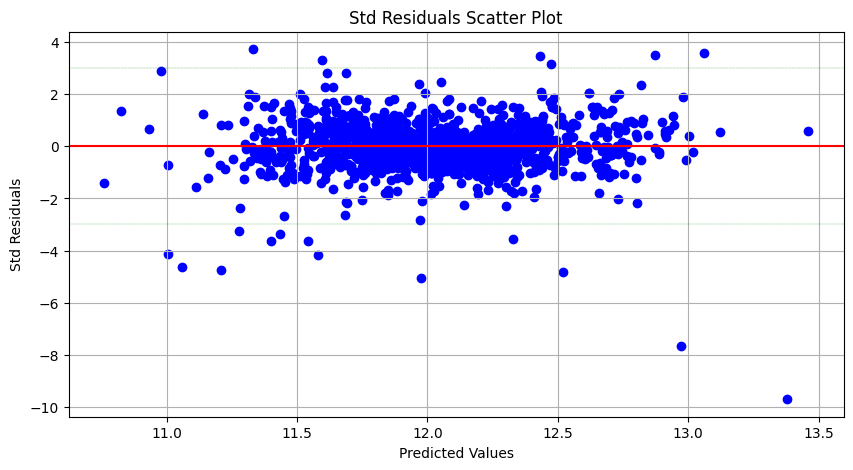

In [31]:
#我們畫畫殘差圖看看
y_hat = lin_mod.predict(X_train)
residuals = y_train - y_hat

plt.figure(figsize=(10,5))
std_residuals = preprocessing.scale(residuals)#標準化residuals
residuals_scatter_plot = plt.scatter(y_hat, std_residuals, color='blue', marker='o')
plt.xlabel('Predicted Values')
plt.ylabel('Std Residuals')
plt.title('Std Residuals Scatter Plot')
plt.axhline(0, color='red')
plt.axhline(3, color='green', linestyle='dashed', linewidth=0.2)#畫上下界+-3是因為如果是常態分配，99.7%的點應該要在裡面
plt.axhline(-3, color='green', linestyle='dashed', linewidth=0.2)

plt.grid()
plt.show()

Text(0, 0.5, 'Std Residuals')

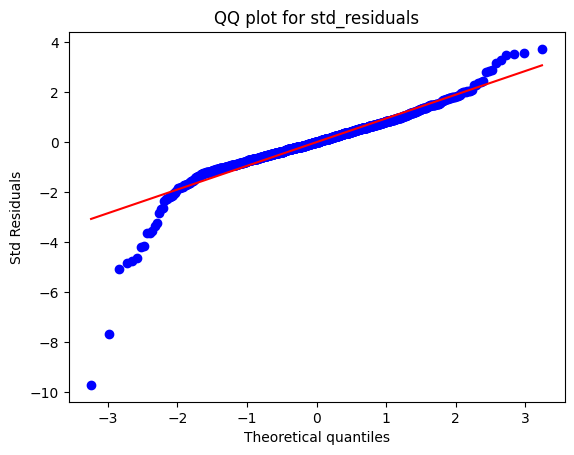

In [32]:
#用QQ-plot看看是否像常態分配，在線上越接近
stats.probplot(std_residuals.ravel(), dist='norm', plot=plt)
plt.title('QQ plot for std_residuals')
plt.ylabel('Std Residuals')

In [33]:
#把資料拆為5份，4份為training，1份為testing，做5次模型，所以這5折的交叉驗證有5個R_square
scores = cross_val_score(lin_mod, X_train, y_train, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

R_square:  [0.83386029 0.87823904 0.8900838  0.90133508 0.8263227 ]
R_square mean:  0.8659681803985528


In [34]:
#把資料拆為5份，4份為training，1份為testing，做5次模型，所以這5折的交叉驗證有5個R_square
scores = cross_val_score(lin_mod, X_test, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

R_square:  [0.90209225 0.93242185 0.90292563 0.87323171 0.8768172 ]
R_square mean:  0.8974977269129217


In [35]:
# # param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
# param_grid = {}
# param_grid['alpha'] = np.arange(0, 0.1, 0.0001)
 
# ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
# ridge_cv.fit(X_train, y_train)

# best_alpha = ridge_cv.best_params_['alpha']
# print('best shrinking parameter: ',best_alpha)

In [36]:
alpha_list = np.arange(0, 1.01, 0.01)  # 包含 1.0
cv = KFold(n_splits=10, shuffle=True, random_state=123)

variance_list = []

# 對每個 alpha 進行交叉驗證
for alpha in alpha_list:
    fold_variances = []  # 儲存每個 fold 的 variance

    for train_index, test_index in cv.split(X_train):
        
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
 
        # 訓練模型
        model = Ridge(alpha=alpha, max_iter=10000)
        model.fit(X_train_fold, y_train_fold)

        # 預測
        y_test_pred = model.predict(X_test_fold)

        # 計算驗證資料的 variance
        variance = np.var(y_test_fold - y_test_pred, axis=0)
        fold_variances.append(variance)

    # 計算當前 alpha 的平均 variance
    avg_variance = np.mean(fold_variances)
    variance_list.append(avg_variance)

Best alpha (minimum variance): 0.04
Test Variance: 0.17308733568642917


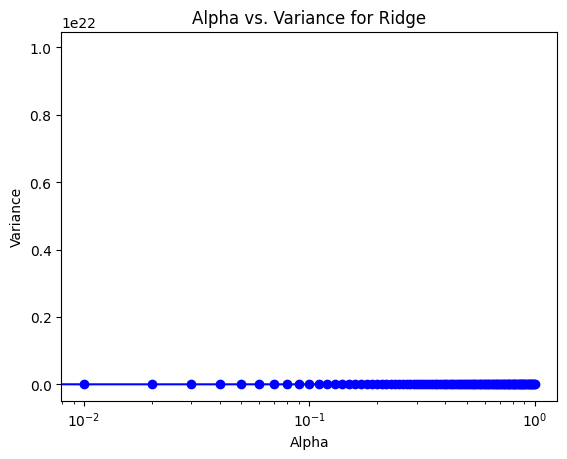

In [37]:
#找到最小variacne的alpha
best_alpha_index = np.argmin(variance_list)
best_alpha = alpha_list[best_alpha_index]

print("Best alpha (minimum variance):", best_alpha)
# 
# 用最佳 alpha 重新訓練模型
ridge_best = Ridge(alpha=best_alpha, max_iter=10000)
ridge_best.fit(X_train, y_train)

# 測試數據上的性能
y_test_pred = ridge_best.predict(X_test)
test_variance = np.var(y_test.values - y_test_pred)
print("Test Variance:", test_variance)

# 繪圖查看 alpha 與方差的關係
plt.plot(alpha_list, variance_list, color='blue', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Variance')
plt.title('Alpha vs. Variance for Ridge')
plt.show()

In [38]:
ridge_lin_mod = Ridge(alpha=best_alpha)
ridge_lin_mod.fit(X_train, y_train)

print('R_square: ',ridge_lin_mod.score(X_train, y_train))
print('coef: ',ridge_lin_mod.coef_)
print('intercept: ',ridge_lin_mod.intercept_)

#把資料拆為5份，4份為training，1份為testing，做5次模型，所以這5折的交叉驗證有5個R_square
scores = cross_val_score(ridge_lin_mod, X_test, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

R_square:  0.8966316718252563
coef:  [[-0.15662033  0.12322353  0.15598507  0.33156349  0.03432414  0.23740743
   0.09266387 -0.05971843  0.52957048  0.31997935  0.06632255  0.01018581
   0.02633392  0.02549906  0.04432823  0.05934584  0.11081572  0.06560593
   0.04259454  0.07875396  1.25269058  0.22537942  0.07860936  0.07891294
   0.05531393  0.06708758  0.08534702 -0.09585067  0.03712044  0.25278112
   0.17076936  0.03358916  0.09330464  0.03951016  0.16083001  1.71348186
  -1.49109035 -0.01971433  0.1028251   0.06157732  0.14747152]]
intercept:  [9.87530328]
R_square:  [0.90426598 0.93344007 0.9046884  0.87678784 0.87763244]
R_square mean:  0.8993629456431769


In [39]:
ridge_feature_importances = ridge_lin_mod.coef_[0]

feature_importances_df = pd.DataFrame({'features': X.columns,
                                      'feature_importances':ridge_feature_importances
                                      })

feature_importances_df = feature_importances_df.sort_values(by = 'feature_importances', ascending = False).reset_index(drop=True)
feature_importances_df

,features,feature_importances
0,PoolArea,1.713482
1,GrLivArea,1.252691
2,OverallQual,0.529570
3,Utilities,0.331563
4,OverallCond,0.319979
5,GarageCars,0.252781
6,Neighborhood,0.237407
7,BsmtFullBath,0.225379
8,GarageQual,0.170769
9,ScreenPorch,0.160830


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\2162859221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')


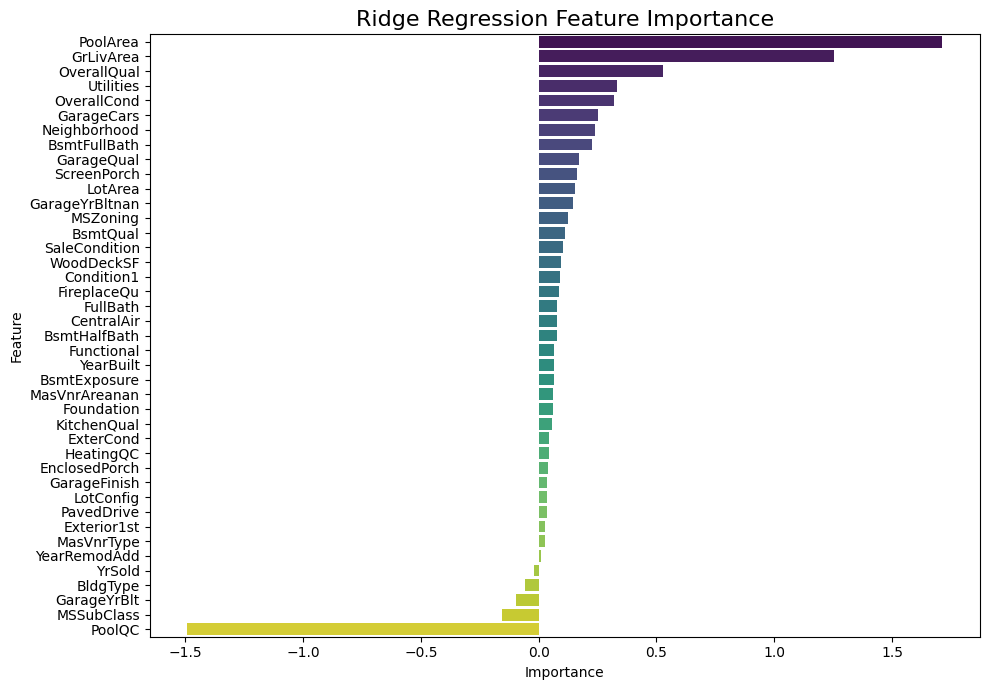

In [40]:
#將特徵重要性畫成圖
plt.figure(figsize=(10,7))
sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')
plt.title('Ridge Regression Feature Importance', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [41]:
param_grid = {}
param_grid['alpha'] = np.arange(0, 1.01, 0.01)

cv = KFold(n_splits=10, shuffle=True, random_state=123)

lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='r2', cv=cv)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.best_params_['alpha']
print('best shrinking parameter: ',best_alpha)

C:\Python310\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.040e+00, tolerance: 1.748e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-pac

best shrinking parameter:  0.0


C:\Python310\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.704e+00, tolerance: 1.894e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [42]:
# alpha_list = np.arange(0, 1, 0.01)

# cv = KFold(n_splits=10, shuffle= True, random_state=123)

# variance_list = []

# for alpha in alpha_list:
#     fold_variances = []

#     for train_index, test_index in cv.split(X_train):
#         X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
#         y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
 
#         #訓練模型
#         model = Lasso(alpha, max_iter=10000)
#         model.fit(X_train_fold, y_train_fold)

#         #驗證數據
#         y_test_pred = model.predict(X_test_fold)

#         #計算驗證資料的variance
#         variance = np.var(y_test_fold.values - y_test_pred)
#         fold_variances.append(variance)
        
#     #計算現在這個alpha的variance的平均
#     avg_variance = np.mean(fold_variances)
#     variance_list.append(avg_variance)

C:\Python310\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Best alpha (minimum variance): 0.0
Test Variance: 0.27907660166767223


C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.704e+00, tolerance: 1.894e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


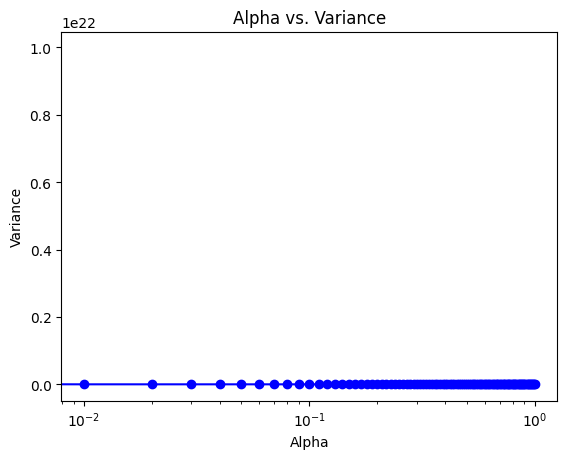

In [43]:
#找到最小variacne的alpha
print("Best alpha (minimum variance):", best_alpha)

# 用最佳 alpha 重新訓練模型
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train, y_train)

# 測試數據上的性能
y_test_pred = lasso_best.predict(X_test)
test_variance = np.var(y_test.values - y_test_pred)
print("Test Variance:", test_variance)

# 繪圖查看 alpha 與方差的關係
plt.plot(alpha_list, variance_list, color='blue', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Variance')
plt.title('Alpha vs. Variance')
plt.show()

In [44]:
lasso_lin_mod = Lasso(alpha=best_alpha)
lasso_lin_mod.fit(X_train, y_train)

print('R_square: ',lasso_lin_mod.score(X_train, y_train))
print('coef: ',lasso_lin_mod.coef_)
print('intercept: ',lasso_lin_mod.intercept_)

#把資料拆為5份，4份為training，1份為testing，做5次模型，所以這5折的交叉驗證有5個R_square
scores = cross_val_score(lasso_lin_mod, X_test, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

R_square:  0.8975297590563338
coef:  [-0.15723177  0.12240813  0.18051098  0.34512412  0.03181939  0.23394142
  0.08742339 -0.05981821  0.53542159  0.31630365  0.0735133   0.01198305
  0.02422007  0.02629796  0.04548865  0.0607569   0.10725349  0.0646818
  0.04373803  0.07779041  1.29438811  0.23182037  0.08709892  0.07103898
  0.05298981  0.06875173  0.08164787 -0.0919776   0.038121    0.24253681
  0.15422399  0.03461305  0.08138319  0.05012621  0.16766981  3.16223753
 -2.64137806 -0.0191212   0.1029819   0.06029349  0.13415653]
intercept:  [9.86811204]
R_square:  [0.90209225 0.93242185 0.90292563 0.87323171 0.8768172 ]
R_square mean:  0.8974977269129217


C:\Python310\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.704e+00, tolerance: 1.894e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-pac

<h1 style="font-size:20px; color:blue;">這裡使用隨機森林的回歸樹，使用bagging method</h1>

In [45]:
param_grid = {
    'n_estimators': [50, 70, 100],
    'max_depth': [5, 10, 15], #None是不限制
    'min_samples_split': [2, 5, 10], #每次分裂需要的最少樣本數(避免過小的分裂)
    'min_samples_leaf': [1, 2, 5] #每個葉子節點至少包含的樣本數(防止模型學習到過細的模式)
}

cv = KFold(n_splits=3, shuffle=True, random_state=123)

rf_cv = GridSearchCV(estimator = RandomForestRegressor(random_state=123),
                     param_grid = param_grid,
                     cv = cv,
                     scoring = 'r2',
                     n_jobs = -1)

rf_cv.fit(X_train, y_train)

best_params = rf_cv.best_params_
print('best parameters: ',best_params)

C:\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
# rf_reg_mod = RandomForestRegressor(n_estimators=100, random_state=123)
# rf_reg_mod.fit(X_train, y_train)

rf_reg_mod = RandomForestRegressor(**best_params) #解包字典
rf_reg_mod.fit(X_train, y_train)

print('R_square: ',rf_reg_mod.score(X_train, y_train))

C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R_square:  0.9811115547867197


In [47]:
scores = cross_val_score(rf_reg_mod, X_test, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

R_square:  [0.82514597 0.90756733 0.8869583  0.8945441  0.79826906]
R_square mean:  0.8624969514018025


In [48]:
rf_feature_importances = rf_reg_mod.feature_importances_

feature_importances_df = pd.DataFrame({'features': X.columns,
                                      'feature_importances':rf_feature_importances
                                     })

feature_importances_df = feature_importances_df.sort_values(by = 'feature_importances', ascending = False).reset_index(drop=True)
feature_importances_df

,features,feature_importances
0,OverallQual,0.542694
1,GrLivArea,0.138591
2,Neighborhood,0.079043
3,GarageCars,0.046839
4,LotArea,0.025300
5,YearBuilt,0.017673
6,CentralAir,0.014612
7,YearRemodAdd,0.012043
8,OverallCond,0.010413
9,MSZoning,0.009037


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\3945172053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')


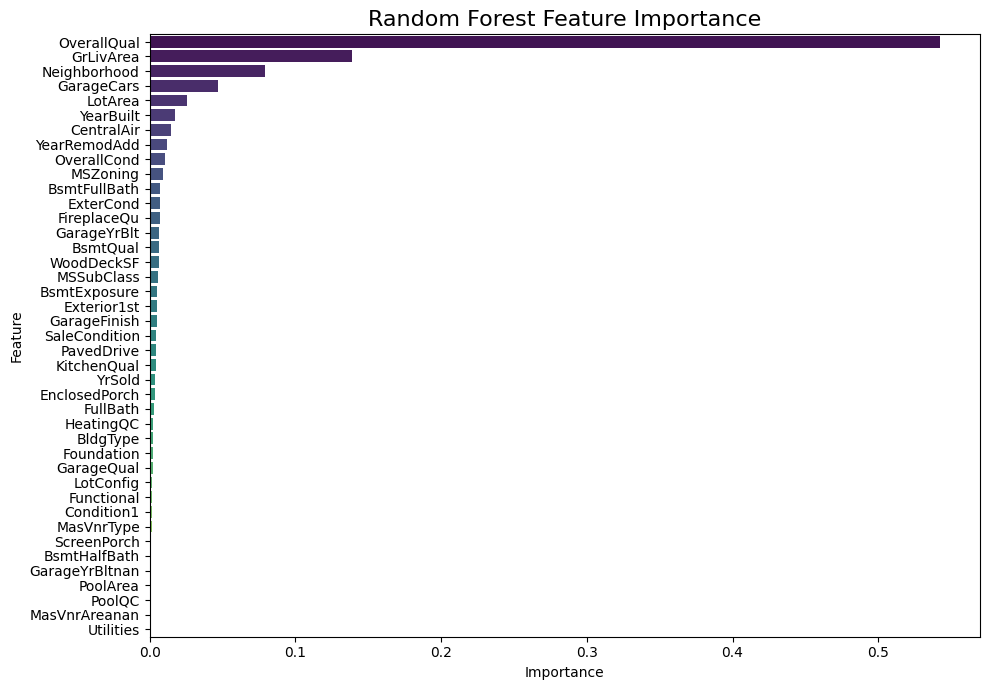

In [49]:
#將特徵重要性畫成圖
plt.figure(figsize=(10,7))
sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [50]:
#選前8個隨機森林認為是重要的特徵
top_features = feature_importances_df['features'][:9]
print('top important features: \n', top_features)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#再次挑選最佳參數組合
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15], #None是不限制
    'min_samples_split': [2, 5, 10], #每次分裂需要的最少樣本數(避免過小的分裂)
    'min_samples_leaf': [1, 2, 5] #每個葉子節點至少包含的樣本數(防止模型學習到過細的模式)
}

cv = KFold(n_splits=3, shuffle=True, random_state=123)

rf_cv = GridSearchCV(estimator = RandomForestRegressor(random_state=123),
                     param_grid = param_grid,
                     cv = cv,
                     scoring = 'r2',
                     n_jobs = -1)

rf_cv.fit(X_train_top, y_train)

best_params = rf_cv.best_params_
print('best parameters: ',best_params)

#再訓練一次回歸樹
rf_reg_mod = RandomForestRegressor(**best_params) #解包字典
rf_reg_mod.fit(X_train_top, y_train)

print('R_square: ',rf_reg_mod.score(X_train_top, y_train))

#再驗證一次testing data
scores = cross_val_score(rf_reg_mod, X_test_top, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

top important features: 
 0     OverallQual
1       GrLivArea
2    Neighborhood
3      GarageCars
4         LotArea
5       YearBuilt
6      CentralAir
7    YearRemodAdd
8     OverallCond
Name: features, dtype: object


C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R_square:  0.955507782902016


C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

R_square:  [0.79091011 0.88922105 0.88467503 0.84828512 0.80018481]
R_square mean:  0.8426552237197195


<h1 style="font-size:20px; color:blue;">這裡使用XGBoost的回歸樹，使用Boost method</h1>

In [51]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [1, 3, 5],
              'learning_rate': [0.01, 0.1, 1.0],
              'subsample': [0.3, 0.5, 0.7], #每棵樹的樣本比例
              'colsample_bytree': [0.5, 0.7, 1.0] #每棵樹的特徵比例
             }

cv = KFold(n_splits=3, shuffle=True, random_state=123)

xgb_cv = GridSearchCV(estimator = XGBRegressor(random_state=123),
                     param_grid = param_grid,
                     cv = cv,
                     scoring = 'r2',
                     n_jobs = -1)

xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
print('best parameters: ',best_params)

best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}


In [52]:
xgb_reg_mod = XGBRegressor(**best_params) #解包字典
xgb_reg_mod.fit(X_train, y_train)

print('R_square: ',xgb_reg_mod.score(X_train, y_train))

R_square:  0.9635019898414612


In [53]:
scores = cross_val_score(xgb_reg_mod, X_test, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

R_square:  [0.86275542 0.93450475 0.89355487 0.90520895 0.81193221]
R_square mean:  0.8815912365913391


In [54]:
xgb_feature_importances = xgb_reg_mod.feature_importances_

feature_importances_df = pd.DataFrame({'features': X.columns,
                                      'feature_importances':xgb_feature_importances
                                     })

feature_importances_df = feature_importances_df.sort_values(by = 'feature_importances', ascending = False).reset_index(drop=True)
feature_importances_df

,features,feature_importances
0,OverallQual,0.211133
1,KitchenQual,0.111550
2,Neighborhood,0.077631
3,GarageCars,0.075203
4,GarageFinish,0.061837
5,GrLivArea,0.053438
6,CentralAir,0.049714
7,BsmtQual,0.037572
8,FireplaceQu,0.031577
9,FullBath,0.027214


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21284\1100585604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')


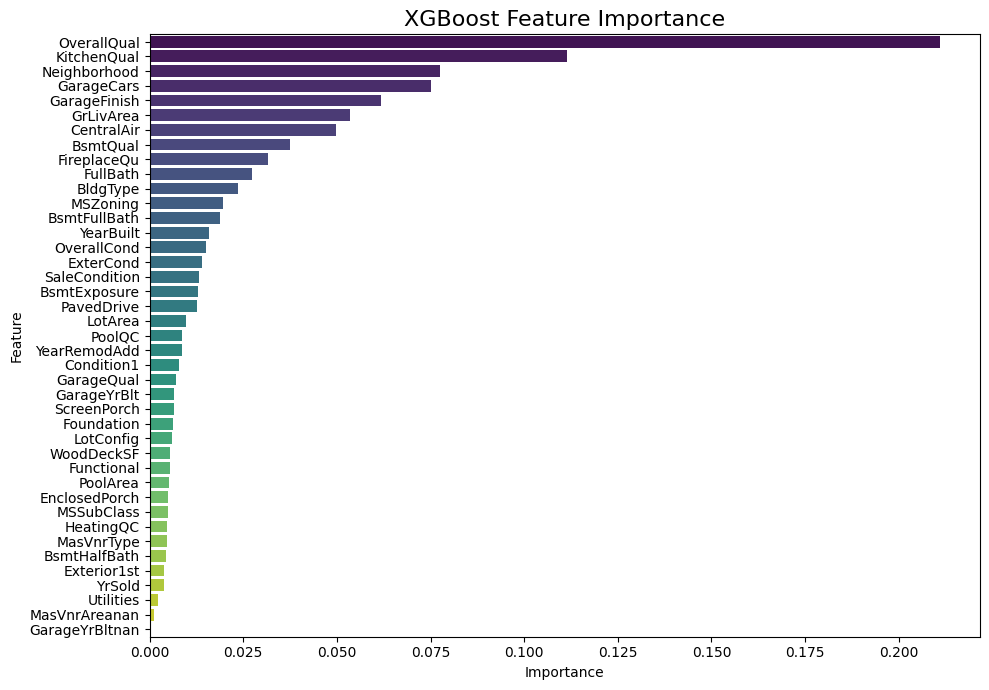

In [55]:
#將特徵重要性畫成圖
plt.figure(figsize=(10,7))
sns.barplot(x='feature_importances', y='features', data=feature_importances_df,palette='viridis')
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [56]:
#選前18個xgb認為是重要的特徵
top_features = feature_importances_df['features'][:18]
print('top important features: \n', top_features)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#再次挑選最佳參數組合
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [1, 3, 5],
              'learning_rate': [0.01, 0.1, 1.0],
              'subsample': [0.3, 0.5, 0.7], #每棵樹的樣本比例
              'colsample_bytree': [0.5, 0.7, 1.0] #每棵樹的特徵比例
             }

cv = KFold(n_splits=3, shuffle=True, random_state=123)

xgb_cv = GridSearchCV(estimator = XGBRegressor(random_state=123),
                     param_grid = param_grid,
                     cv = cv,
                     scoring = 'r2',
                     n_jobs = -1)

xgb_cv.fit(X_train_top, y_train)

best_params = xgb_cv.best_params_
print('best parameters: ',best_params)

#再訓練一次回歸樹
xgb_reg_mod = XGBRegressor(**best_params, reg_alpha=0.01, eta=0.01) #解包字典
xgb_reg_mod.fit(X_train_top, y_train)

print('R_square: ',xgb_reg_mod.score(X_train_top, y_train))

#再驗證一次testing data
scores = cross_val_score(xgb_reg_mod, X_test_top, y_test, scoring='r2', cv=5)

print('R_square: ', scores)
print('R_square mean: ', scores.mean())

top important features: 
 0       OverallQual
1       KitchenQual
2      Neighborhood
3        GarageCars
4      GarageFinish
5         GrLivArea
6        CentralAir
7          BsmtQual
8       FireplaceQu
9          FullBath
10         BldgType
11         MSZoning
12     BsmtFullBath
13        YearBuilt
14      OverallCond
15        ExterCond
16    SaleCondition
17     BsmtExposure
Name: features, dtype: object


C:\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
R_square:  0.9599549174308777
R_square:  [0.85491145 0.92814934 0.92008615 0.90922117 0.86694849]
R_square mean:  0.8958633184432984


In [57]:
# XGBRegressor?

<h1 style="font-size:20px; color:blue;">最後，使用DNN Model</h1>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization, Input

from tensorflow.keras.optimizers import Adam

from sklearn.metrics import r2_score

from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os 

In [32]:
dnn = Sequential()

# dnn.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))
dnn.add(Input(shape=(X_train.shape[1],)))
dnn.add(Dense(32, activation='relu'))
dnn.add(BatchNormalization())

dnn.add(Dense(16, activation = 'relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.2))

dnn.add(Dense(1, activation = 'linear'))

dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081 (8.13 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 96 (384.00 B)

In [33]:
import os

output_path = "dnn_output/regression_baseline"

if not os.path.exists(output_path):
    os.makedirs(output_path)

# 早停
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


log_dir = "dnn_output/regression_baseline"  
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
# Configure Model
optimizer = Adam(learning_rate = 0.01)

dnn.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [35]:
history = dnn.fit(X_train, y_train, batch_size = 8, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop, tensorboard_callback])

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 88.8362 - mae: 8.5730 - val_loss: 5.2762 - val_mae: 2.0782
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7256 - mae: 1.4793 - val_loss: 0.2751 - val_mae: 0.4200
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6855 - mae: 1.2805 - val_loss: 0.1702 - val_mae: 0.3387
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1429 - mae: 1.1636 - val_loss: 0.0883 - val_mae: 0.2382
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1262 - mae: 1.1457 - val_loss: 0.1174 - val_mae: 0.2784
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0012 - mae: 1.1430 - val_loss: 0.0930 - val_mae: 0.2373
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9186 - mae: 1.0972 - val_loss: 0.0808 - val_mae: 0.2288
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9053 - mae: 1.1219 - val_loss: 0.0571 - val_mae: 0.1705
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

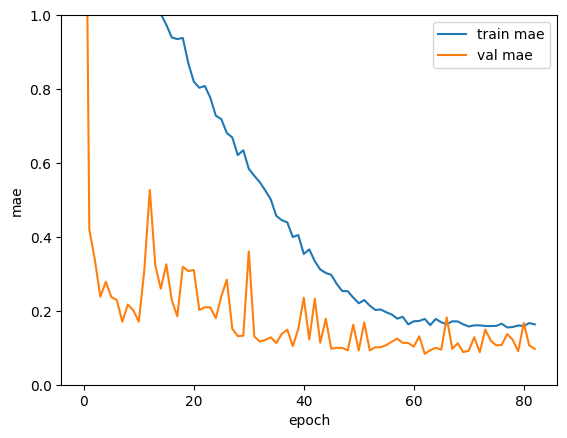

In [36]:
# Plot the learning history
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [37]:
# 訓練後再對獨立的測試集性能評估，確認模型的泛化能力

test_loss, test_mae = dnn.evaluate(X_test, y_test, verbose=1)
print('Test loss: {:.2f}\nTest MAE: {:.2f}'.format(test_loss, test_mae))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - mae: 0.0812 
Test loss: 0.01
Test MAE: 0.08


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


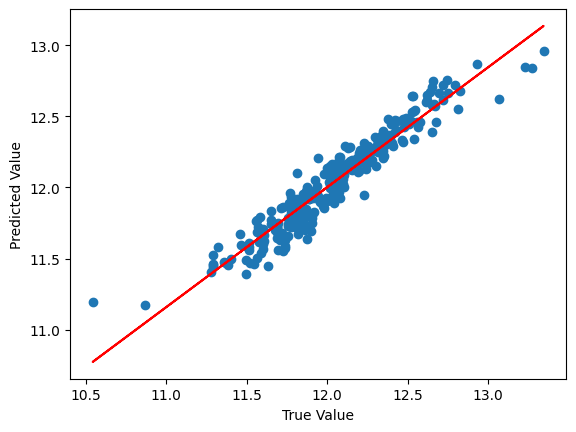

In [38]:
y_pred = dnn.predict(X_test).flatten()
y_test_flatten = y_test.values.flatten()

p = np.polyfit(y_test_flatten, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test_flatten, y_pred)
plt.plot(y_test_flatten, f(y_test_flatten), color = 'r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [39]:
# R square
r2 = r2_score(y_test, y_pred)
print(r2)

0.910378634929657


In [40]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

0.11536545058095714


In [47]:
# model.save("DNN_Model.keras")  # 儲存完整模型

<h1 style="font-size:20px; color:blue;">以 Shap method 增加DNN模型的解釋能力</h1>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32640\180174368.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:10])


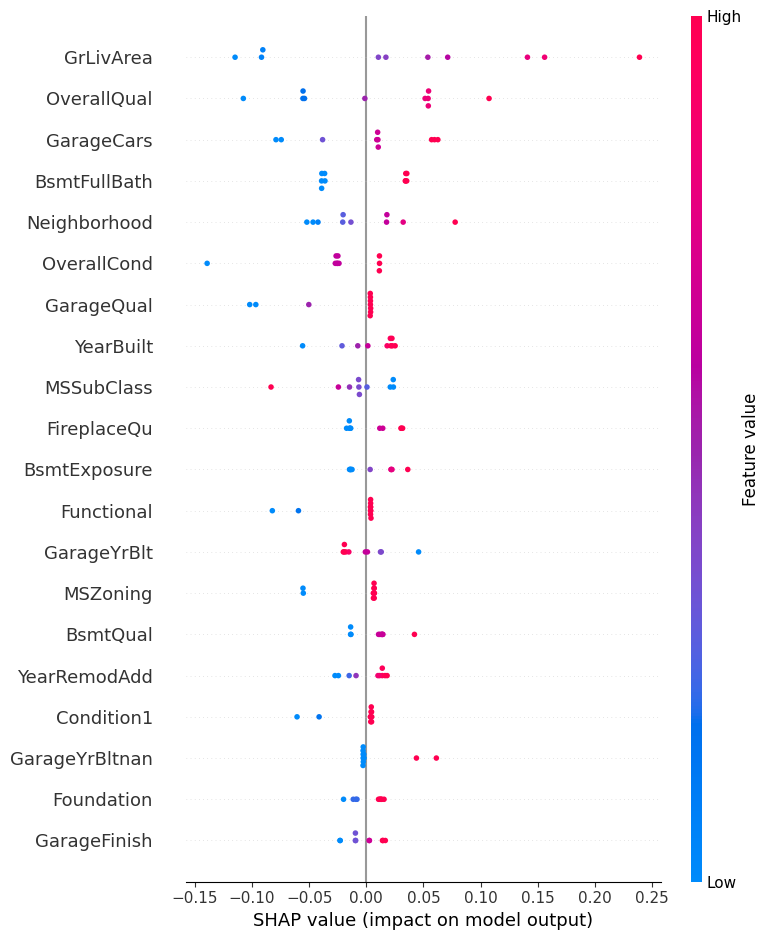

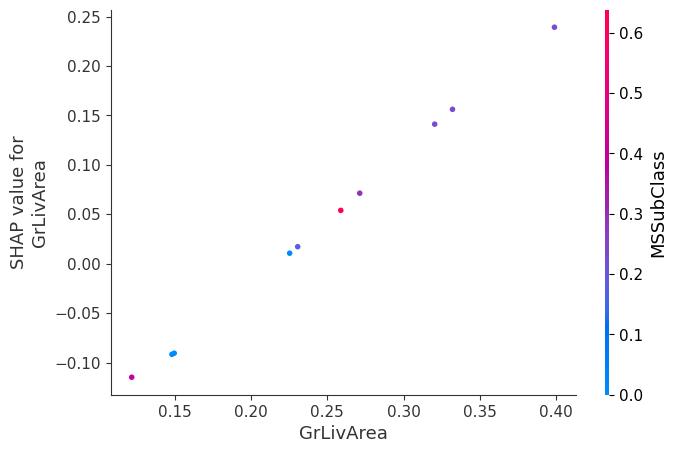

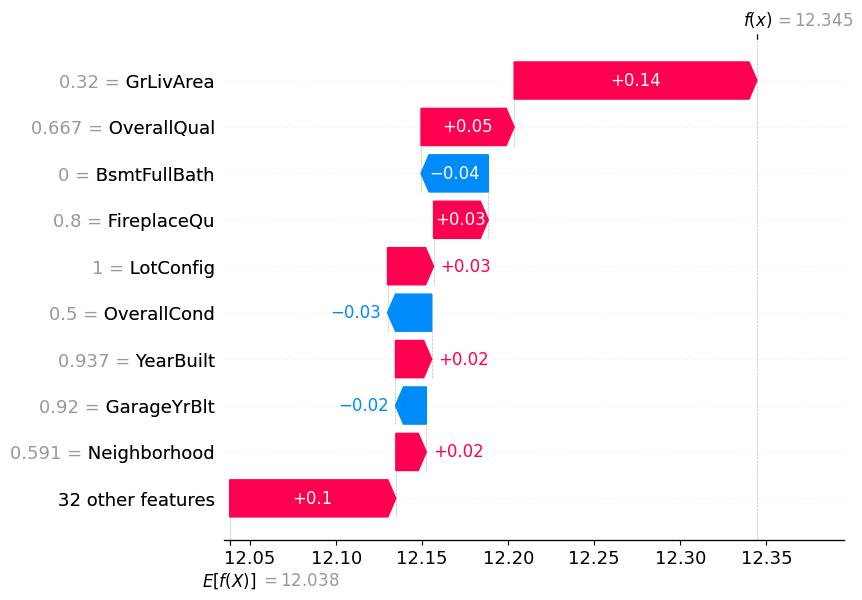

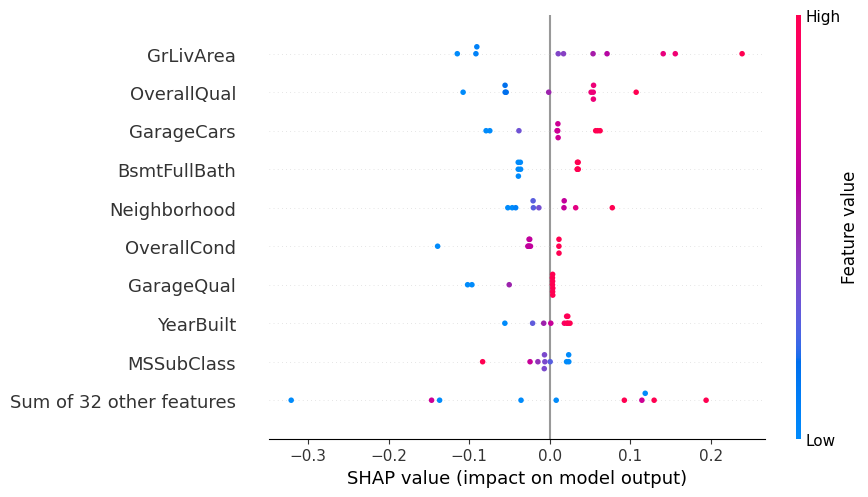

In [53]:
import shap

explainer = shap.Explainer(dnn, X_train[:100])  # 只取部分資料加速計算。
shap_values = explainer(X_test[:10])  # 只選擇 10 筆資料來計算。

np.random.seed(123)  # 全域隨機數種子。

 # Y: 特徵重要性排序， X: shap value > 0 表示值越大，prediction越大， 紅色: larger value。
shap.summary_plot(shap_values, X_test[:10])

# Y: shap value，表示對某個特徵對prediction的影響，X: feature value，color: 在不同 X，其他特徵對這一個特徵對prediction會有影響(交互作用)，趨勢變化(陡/緩)、線性/非線性。
shap.dependence_plot("GrLivArea", shap_values.values, X_test[:10]) 

# 不同特徵對模型預測結果的貢獻程度，從起始預測值(E[f(x)])開始，逐步加上或減去各個特徵的影響，最終得到預測值，也就是 12.038 + 0.14 + 0.05 - 0.04 + ... = 12.345；
# 因此，最終預測值=E[f(X)]+∑各特徵貢獻，左側的值是X_test第一筆data的特徵值，右側是該特徵對預測的「淨影響」，也就是X_test第一筆data的增加值(也就是shap value)；
# 所以"最終預測值就是起始預測值(E[f(x)])加上所有特徵的 SHAP 值（右側數字）"，這就是 SHAP 方法的「可加性公理」。
# 這有點像回歸的 b0 + b1x1 +...，但沒辦法處理非線性和交乘項；但對非線性的模型（如隨機森林、XGBoost），SHAP 仍能保持可加性，且分配交互作用的貢獻。
shap.plots.waterfall(shap_values[0])  # 用第 0 筆 test data，可用 max_display = 20，畫出更多特徵。

# 類似Summary Plot，X軸(shap value)越散，該特徵對prediction影響越大(不確定性高)，在0附近，對prediction影響越小。
shap.plots.beeswarm(shap_values)

In [49]:
print(shap_values.shape)
print(X_test[:10].shape)
print(X_test.columns)

(10, 41)
(10, 41)
Index(['MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'MasVnrType', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'SaleCondition',
       'MasVnrAreanan', 'GarageYrBltnan'],
      dtype='object')


In [56]:
np.exp(y_pred)

array([229699.73 ,  95737.38 , 138807.88 , 259870.44 , 136364.11 ,
       227607.44 , 318636.56 , 125437.39 , 148972.66 , 119496.79 ,
       142766.28 , 214627.23 , 138567.03 , 113853.28 , 262783.28 ,
       184858.88 , 138056.95 , 316953.88 , 214329.22 , 191768.89 ,
       171174.36 , 187293.34 , 121851.67 , 158459.48 , 210802.81 ,
       150195.2  , 214152.28 , 185319.39 , 123002.88 , 132294.86 ,
       136256.08 , 217944.36 , 139411.36 , 183139.73 , 282668.1  ,
       197443.67 , 176296.69 , 303830.9  , 187325.14 ,  95869.86 ,
       157060.73 , 194855.89 , 197185.14 , 149099.02 , 210574.55 ,
       117187.53 , 289858.03 , 239882.64 , 235042.19 , 125969.18 ,
       203504.98 , 200155.16 , 155920.55 , 152809.56 ,  98637.38 ,
       164520.39 , 133689.88 , 153221.23 , 233119.9  , 334341.8  ,
       102355.09 , 316269.66 , 113592.66 , 170949.55 , 223204.06 ,
       127191.05 , 127070.54 , 228597.02 , 218982.53 , 148245.48 ,
       149924.88 , 156317.78 , 162370.16 , 243494.62 , 145561.